# ***Exploratory Data Analysis (EDA):***

In [1]:
import pandas as pd

# Specify the encoding when reading the CSV file
df = pd.read_csv("/content/drive/MyDrive/content/test.csv", encoding='latin1')


In [ ]:
#DataFrame Information Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [ ]:
#Initial Overview of the Dataset
print(df.head())

       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²)  
0             60.0  
1            1

In [ ]:
#Statistical Summary of Sentiment Analysis Dataset
print(df.describe())

       Population -2020  Land Area (Km²)  Density (P/Km²)
count      3.534000e+03     3.534000e+03      3534.000000
mean       3.941891e+07     6.722499e+05       348.894171
std        1.468757e+08     1.839134e+06      1967.012367
min        8.010000e+02     0.000000e+00         2.000000
25%        1.968001e+06     2.281000e+04        35.000000
50%        8.696453e+06     1.127600e+05        87.000000
75%        2.843594e+07     5.279700e+05       214.000000
max        1.439324e+09     1.637687e+07     26337.000000


In [ ]:
#sample elements of the dataset
df.sample(5)

textID                                               text sentiment  \
4518         NaN                                                NaN       NaN   
3376  9e734c1ed3                     I`ll put your name on the list   neutral   
832   fd1ebb37c3   Oui mademoiselle. You can barely turn around ...   neutral   
2304  1937abbaac  i`m sunburnt on my arms, and i have burnt my m...  negative   
4081         NaN                                                NaN       NaN   

     Time of Tweet Age of User      Country  Population -2020  \
4518           NaN         NaN          NaN               NaN   
3376          noon       60-70        Sudan        43849260.0   
832           noon       60-70  El Salvador         6486205.0   
2304       morning       46-60     Mongolia         3278290.0   
4081           NaN         NaN          NaN               NaN   

      Land Area (Km²)  Density (P/Km²)  
4518              NaN              NaN  
3376        1765048.0             25.0  
832           20720.0            313.0  
2304        1553560.0              2.0  
4081              NaN              NaN

In [ ]:
#Dataset columns
df.columns

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')

In [ ]:
#Shape of the dataset
df.shape

(4815, 9)

In [ ]:
# Check for Missing Values
print(df.isnull().sum())

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64


# ***Data Exploration:***

In [ ]:
# Examine the Text Data
text_column = 'text'
print(df[text_column].head())

0    Last session of the day  http://twitpic.com/67ezh
1     Shanghai is also really exciting (precisely -...
2    Recession hit Veronique Branquinho, she has to...
3                                          happy bday!
4               http://twitpic.com/4w75p - I like it!!
Name: text, dtype: object


In [ ]:
#Explore Sentiment Labels
sentiment_column = 'sentiment'
print(df[sentiment_column].value_counts())

neutral     1430
positive    1103
negative    1001
Name: sentiment, dtype: int64


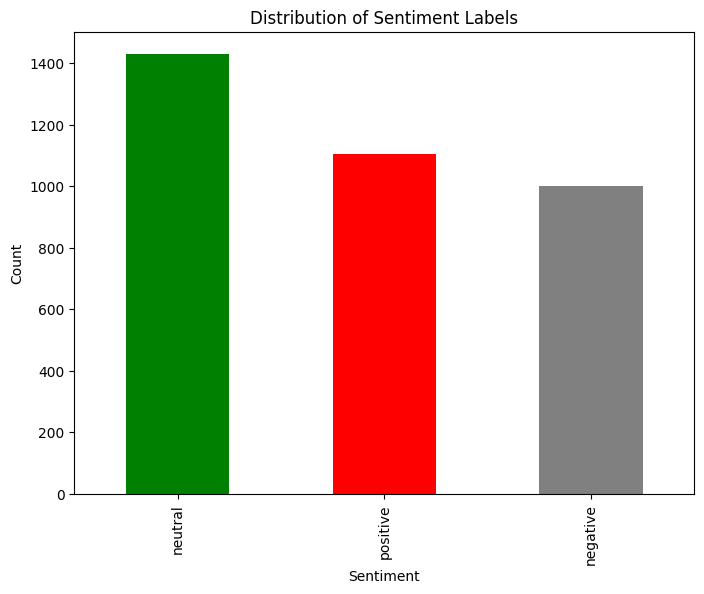

In [ ]:
#Visualize the Data
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df[sentiment_column].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


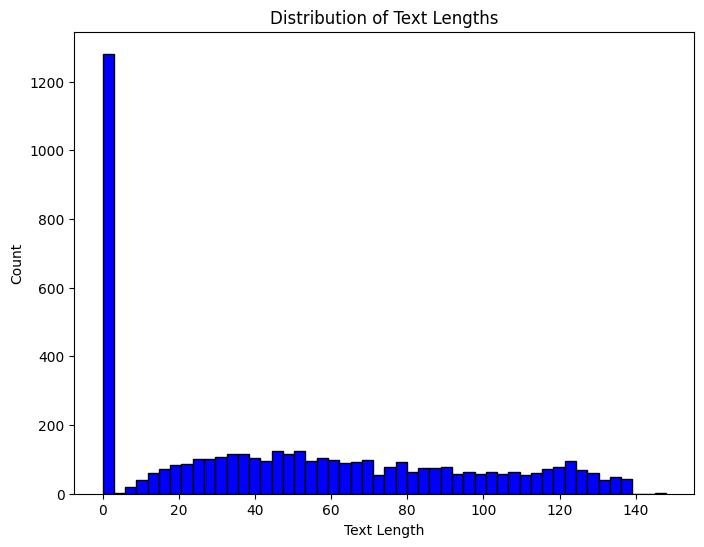

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

text_column = 'text'

# Handle NaN values by replacing them with an empty string
df[text_column] = df[text_column].fillna('')

# Calculate text length and create a new column 'text_length'
df['text_length'] = df[text_column].apply(len)

# Plot the distribution
plt.figure(figsize=(8, 6))
df['text_length'].plot(kind='hist', bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


**Explore Text Patterns:**

In [ ]:
# Display samples of positive, negative, and neutral texts
positive_sample = df[df[sentiment_column] == 'positive'][text_column].iloc[0]
negative_sample = df[df[sentiment_column] == 'negative'][text_column].iloc[0]
neutral_sample = df[df[sentiment_column] == 'neutral'][text_column].iloc[0]

print(f"Positive Sample: {positive_sample}")
print(f"Negative Sample: {negative_sample}")
print(f"Neutral Sample: {neutral_sample}")

Positive Sample:  Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China:  (SH)  (BJ).
Negative Sample: Recession hit Veronique Branquinho, she has to quit her company, such a shame!
Neutral Sample: Last session of the day  http://twitpic.com/67ezh


**Correlation Analysis:**

In [ ]:
# Check correlation between text features and sentiment labels
correlation_matrix = df.corr()
print(correlation_matrix)


                  Population -2020  Land Area (Km²)  Density (P/Km²)  \
Population -2020          1.000000         0.460359        -0.017545   
Land Area (Km²)           0.460359         1.000000        -0.053965   
Density (P/Km²)          -0.017545        -0.053965         1.000000   
text_length               0.017652         0.001923         0.003037   

                  text_length  
Population -2020     0.017652  
Land Area (Km²)      0.001923  
Density (P/Km²)      0.003037  
text_length          1.000000  


<ipython-input-18-22587a3c0349>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


**Data Cleaning:**

In [ ]:

# Handle duplicates, correct errors, or handle outliers
df = df.drop_duplicates(subset=[text_column, sentiment_column])
df = df.dropna()


In [ ]:
# Adjusted Step 5 after cleaning
print(df[sentiment_column].value_counts())

neutral     1430
positive    1103
negative    1001
Name: sentiment, dtype: int64


# ***Data Preprocessing:***

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Step 1: Lowercasing
df['processed_text'] = df['text'].apply(lambda x: x.lower())

In [ ]:
# Step 2: Removing Stop Words
stop_words = set(stopwords.words('english'))
df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

In [ ]:
# Step 3: Handling Special Characters
df['processed_text'] = df['processed_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [ ]:
# Step 4: Tokenization
df['tokenized_text'] = df['processed_text'].apply(lambda x: word_tokenize(x))

In [ ]:
# Step 5: Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_text'] = df['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
# Display the processed data
print(df[['text', 'processed_text', 'lemmatized_text']].head())

                                                text  \
0  Last session of the day  http://twitpic.com/67ezh   
1   Shanghai is also really exciting (precisely -...   
2  Recession hit Veronique Branquinho, she has to...   
3                                        happy bday!   
4             http://twitpic.com/4w75p - I like it!!   

                                      processed_text  \
0             last session day http  twitpiccom67ezh   
1  shanghai also really exciting  precisely  skys...   
2  recession hit veronique branquinho  quit compa...   
3                                        happy bday    
4                      http  twitpiccom4w75p  like     

                                     lemmatized_text  
0        [last, session, day, http, twitpiccom67ezh]  
1  [shanghai, also, really, exciting, precisely, ...  
2  [recession, hit, veronique, branquinho, quit, ...  
3                                      [happy, bday]  
4                      [http, twitpiccom4w75p, like

# ***Data Visualization:***

***Pie Chart:***

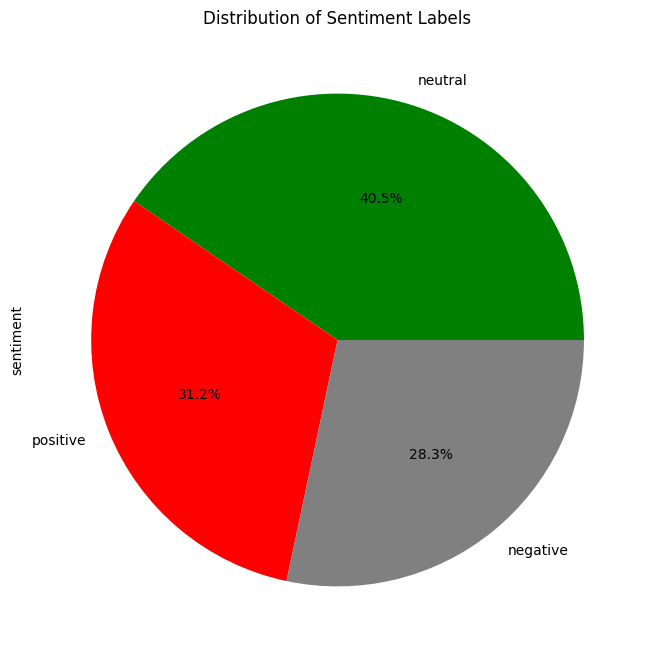

In [ ]:
plt.figure(figsize=(8, 8))
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title('Distribution of Sentiment Labels')
plt.show()

***Histogram:***

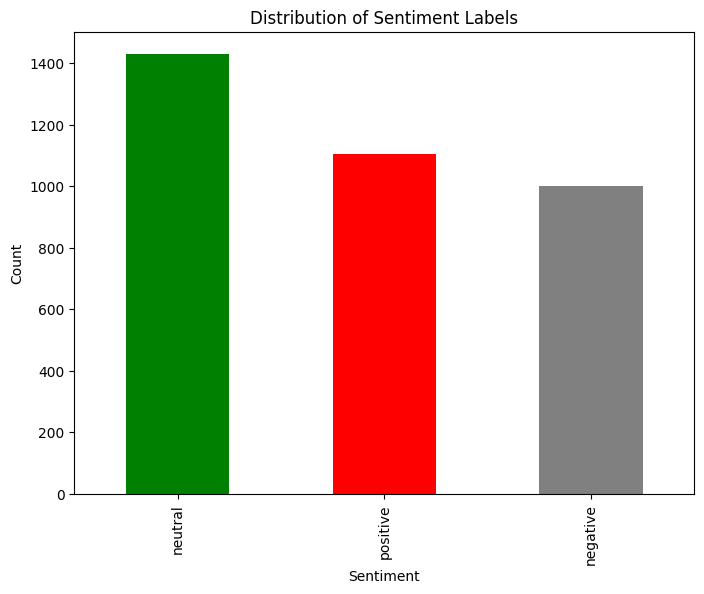

In [ ]:
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

***Word Clouds:***

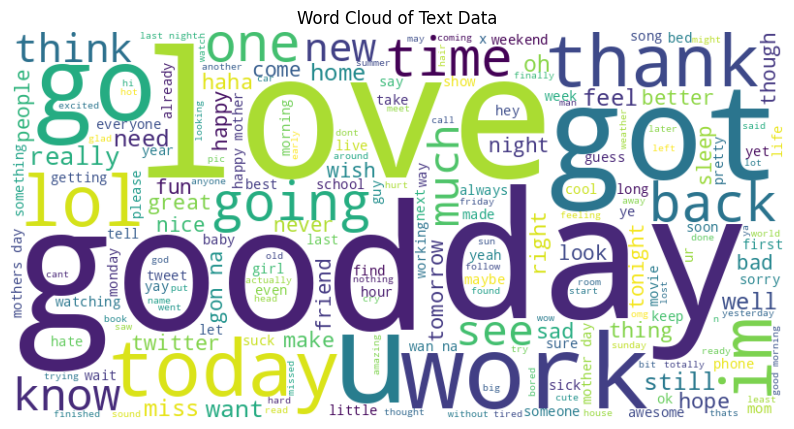

In [ ]:
from wordcloud import WordCloud

# Assuming you have installed the wordcloud library
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['processed_text']))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()


***Box Plots of Text Length:***

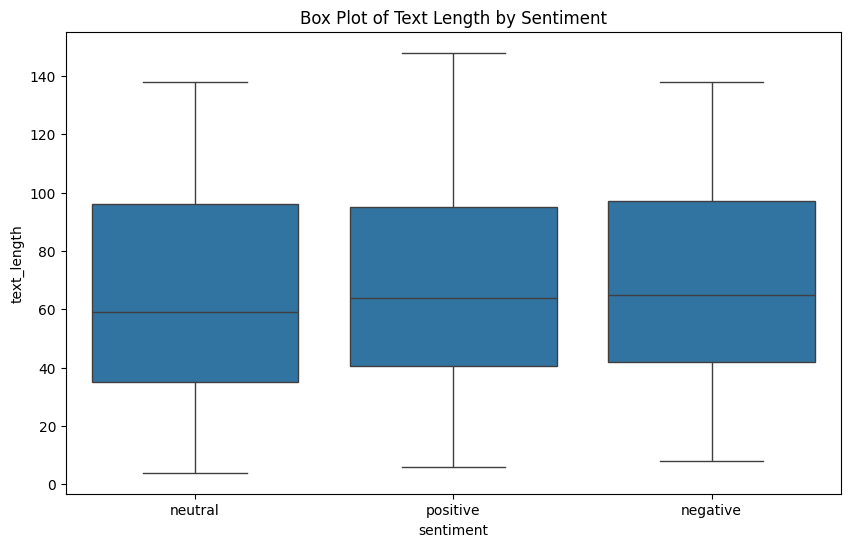

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='text_length', data=df)
plt.title('Box Plot of Text Length by Sentiment')
plt.show()


 Pair Plots for Text Features:

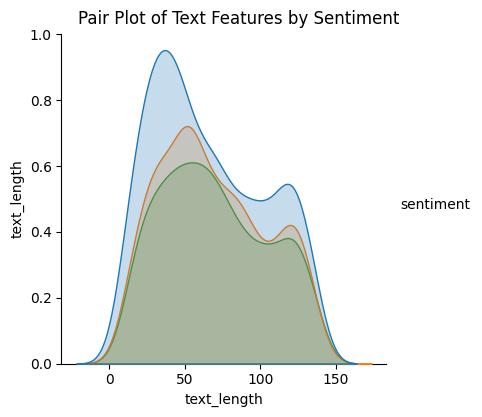

In [ ]:
import seaborn as sns

sns.pairplot(df[['text_length', 'sentiment']], hue='sentiment', height=4)
plt.suptitle('Pair Plot of Text Features by Sentiment', y=1.02)
plt.show()


In [ ]:
import pandas as pd

df['timestamp'] = pd.to_datetime(df['Time of Tweet'] + ' ' + df['Age of User'] + ' ' + df['Country'], errors='coerce')

print(df[['Time of Tweet', 'Age of User', 'Country', 'timestamp']])


     Time of Tweet Age of User          Country timestamp
0          morning        0-20      Afghanistan       NaT
1             noon       21-30          Albania       NaT
2            night       31-45          Algeria       NaT
3          morning       46-60          Andorra       NaT
4             noon       60-70           Angola       NaT
...            ...         ...              ...       ...
3529          noon       21-30        Nicaragua       NaT
3530         night       31-45            Niger       NaT
3531       morning       46-60          Nigeria       NaT
3532          noon       60-70      North Korea       NaT
3533         night      70-100  North Macedonia       NaT

[3534 rows x 4 columns]


In [ ]:
import pandas as pd

df['timestamp'] = pd.to_datetime(df['Time of Tweet'] + ' ' + df['Age of User'] + ' ' + df['Country'], errors='coerce', format='%I%p %d-%m-%Y')

print(df[['Time of Tweet', 'Age of User', 'Country', 'timestamp']])


     Time of Tweet Age of User          Country timestamp
0          morning        0-20      Afghanistan       NaT
1             noon       21-30          Albania       NaT
2            night       31-45          Algeria       NaT
3          morning       46-60          Andorra       NaT
4             noon       60-70           Angola       NaT
...            ...         ...              ...       ...
3529          noon       21-30        Nicaragua       NaT
3530         night       31-45            Niger       NaT
3531       morning       46-60          Nigeria       NaT
3532          noon       60-70      North Korea       NaT
3533         night      70-100  North Macedonia       NaT

[3534 rows x 4 columns]


In [ ]:
import pandas as pd

# Mapping for 'Time of Tweet' categories to numerical values
time_mapping = {'morning': 1, 'noon': 2, 'night': 3}

df['time_numeric'] = df['Time of Tweet'].map(time_mapping)

print(df[['Time of Tweet', 'Age of User', 'Country', 'time_numeric']])


     Time of Tweet Age of User          Country  time_numeric
0          morning        0-20      Afghanistan             1
1             noon       21-30          Albania             2
2            night       31-45          Algeria             3
3          morning       46-60          Andorra             1
4             noon       60-70           Angola             2
...            ...         ...              ...           ...
3529          noon       21-30        Nicaragua             2
3530         night       31-45            Niger             3
3531       morning       46-60          Nigeria             1
3532          noon       60-70      North Korea             2
3533         night      70-100  North Macedonia             3

[3534 rows x 4 columns]


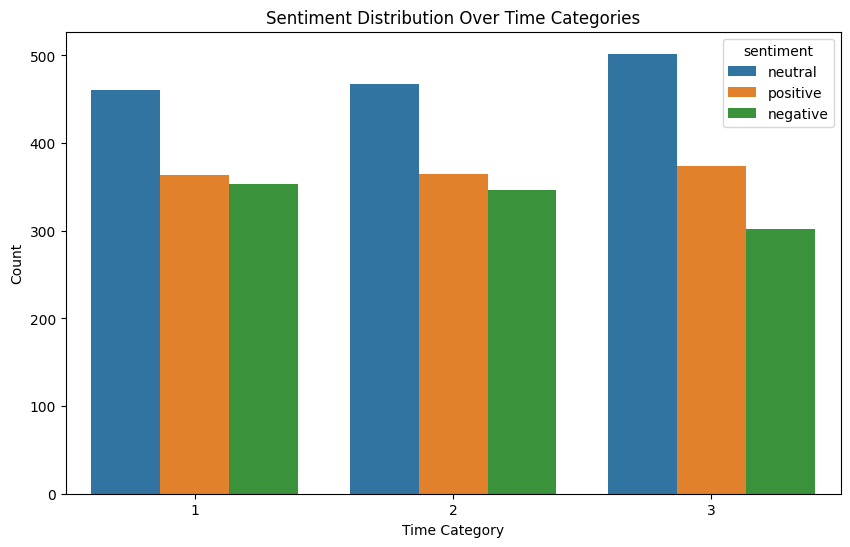

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sentiment' is your sentiment column
plt.figure(figsize=(10, 6))
sns.countplot(x='time_numeric', hue='sentiment', data=df)
plt.title('Sentiment Distribution Over Time Categories')
plt.xlabel('Time Category')
plt.ylabel('Count')
plt.show()


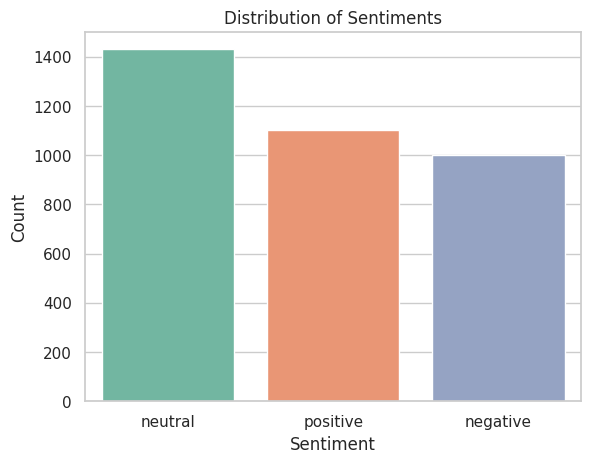

In [ ]:
sns.set(style="whitegrid")

sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2')

# Customize plot labels and title if needed
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Show the plot
plt.show()

<Axes: xlabel='sentiment', ylabel='Count'>

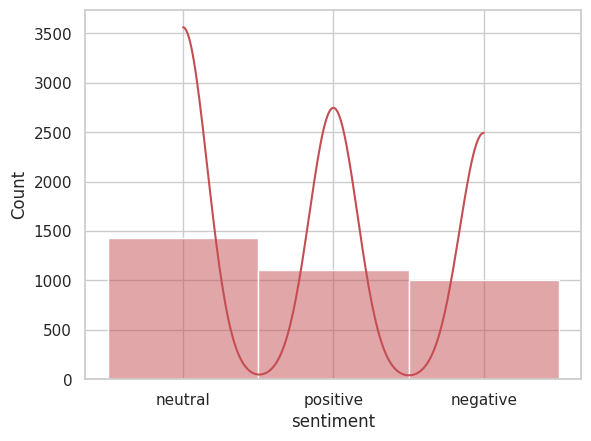

In [ ]:
sns.histplot(df['sentiment'], kde=True, color = 'r')

# *Text Vectorization using TF-IDF:*

In [ ]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Download NLTK resources
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Preprocess Data
def preprocess_data(df, text_column, target_column):
    corpus = []
    stemmer = PorterStemmer()
    for i in range(len(df)):
        review = re.sub('[^a-zA-Z]', ' ', df[text_column][i]).lower().split()
        review = ' '.join([stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))])
        corpus.append(review)
    X = create_tfidf_matrix(corpus)
    y = df[target_column]
    return X, y

In [ ]:
# Create TF-IDF Matrix
def create_tfidf_matrix(corpus, max_features=5000):
    vectorizer = TfidfVectorizer(max_features=max_features)
    return vectorizer.fit_transform(corpus).toarray()

In [ ]:
# Split Dataset
def split_dataset(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
# Train Model
def train_model(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model


In [ ]:
# Evaluate Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [ ]:
# Main Function
def main():
    text_column = 'text'
    target_column = 'sentiment'

    # Preprocess Data
    X, y = preprocess_data(df, text_column, target_column)

    # Split Dataset
    X_train, X_test, y_train, y_test = split_dataset(X, y)

    # Train Model
    model = train_model(X_train, y_train)

    # Evaluate Model
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)

    # Display Results
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 score: {f1}")

if __name__ == "__main__":
    main()

Accuracy: 0.6534653465346535
Precision: 0.6819249723721565
Recall: 0.6534653465346535
F1 score: 0.6504019367863024


# *Model Selection:*

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Download NLTK resources
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Preprocess Data
def preprocess_data(df, text_column, target_column):
    corpus = []
    stemmer = PorterStemmer()
    for i in range(len(df)):
        review = re.sub('[^a-zA-Z]', ' ', df[text_column][i]).lower().split()
        review = ' '.join([stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))])
        corpus.append(review)
    X = create_tfidf_matrix(corpus)
    y = df[target_column]
    return X, y

In [ ]:
# Create TF-IDF Matrix
def create_tfidf_matrix(corpus, max_features=5000):
    vectorizer = TfidfVectorizer(max_features=max_features)
    return vectorizer.fit_transform(corpus).toarray()

In [ ]:
# Split Dataset
def split_dataset(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
# Train Model
def train_model(X_train, y_train, model_type):
    if model_type == 'naive_bayes':
        model = MultinomialNB()
    elif model_type == 'svm':
        model = SVC()
    else:
        raise ValueError(f"Invalid model type: {model_type}")

    model.fit(X_train, y_train)
    return model

In [ ]:
# Evaluate Model
def evaluate_model(model, X_test, y_test, model_type):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

***Naive Bayes Model:***

In [ ]:
# Main Function
def main():
    # Assuming you have already loaded the dataset into 'df'
    # If the column names are different, update them accordingly
    text_column = 'text'
    target_column = 'sentiment'

    # Preprocess Data
    X, y = preprocess_data(df, text_column, target_column)

    # Split Dataset
    X_train, X_test, y_train, y_test = split_dataset(X, y)

    # Train and Evaluate Naive Bayes Model
    nb_model = train_model(X_train, y_train, 'naive_bayes')
    accuracy_nb, precision_nb, recall_nb, f1_nb = evaluate_model(nb_model, X_test, y_test, 'naive_bayes')
    print(f"Naive Bayes Accuracy: {accuracy_nb}")
    print(f"Naive Bayes Precision: {precision_nb}")
    print(f"Naive Bayes Recall: {recall_nb}")
    print(f"Naive Bayes F1 score: {f1_nb}")

if __name__ == "__main__":
    main()


Naive Bayes Accuracy: 0.6039603960396039
Naive Bayes Precision: 0.6577392428654276
Naive Bayes Recall: 0.6039603960396039
Naive Bayes F1 score: 0.591900423142609


***Support Vector Machines Model:***

In [ ]:
# Main Function
def main():
    # Assuming you have already loaded the dataset into 'df'
    # If the column names are different, update them accordingly
    text_column = 'text'
    target_column = 'sentiment'

    # Preprocess Data
    X, y = preprocess_data(df, text_column, target_column)

    # Split Dataset
    X_train, X_test, y_train, y_test = split_dataset(X, y)

    # Train and Evaluate SVM Model
    svm_model = train_model(X_train, y_train, 'svm')
    accuracy_svm, precision_svm, recall_svm, f1_svm = evaluate_model(svm_model, X_test, y_test, 'svm')
    print(f"SVM Accuracy: {accuracy_svm}")
    print(f"SVM Precision: {precision_svm}")
    print(f"SVM Recall: {recall_svm}")
    print(f"SVM F1 score: {f1_svm}")

if __name__ == "__main__":
    main()

SVM Accuracy: 0.6407355021216408
SVM Precision: 0.7229545575395347
SVM Recall: 0.6407355021216408
SVM F1 score: 0.6276273879574489


## ***Hyperparameter Tuning using GridSearchCV:***

In [ ]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.datasets import make_classification  # Add this import statement
from sklearn.model_selection import train_test_split

In [ ]:
# Modify the column names according to your dataset
feature_columns = [f'feature_{i}' for i in range(1, 21)]
target_column = 'target'

# Create a synthetic dataset for illustration
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()

In [ ]:

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

In [ ]:
# Fit the GridSearchCV object to the training data
logreg_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [ ]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.8487500000000001


# ***Cross-Validation :***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
import numpy as np

In [ ]:
# Modify the column names according to your dataset
feature_columns = [f'feature_{i}' for i in range(1, 21)]
target_column = 'target'

# Create a synthetic dataset for illustration
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Instantiate logistic regression classifier
logreg = LogisticRegression()

In [ ]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [ ]:
# Create the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit the GridSearchCV object to the entire dataset
logreg_cv.fit(X, y)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [ ]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.853


In [ ]:
# Perform cross-validation to assess generalization performance
cv_scores = cross_val_score(logreg_cv.best_estimator_, X, y, cv=5, scoring='accuracy')

In [ ]:
# Print the cross-validation scores
print("Cross-Validation Scores: {}".format(cv_scores))
print("Mean Cross-Validation Score: {:.2f}".format(np.mean(cv_scores)))

Cross-Validation Scores: [0.9   0.83  0.84  0.85  0.845]
Mean Cross-Validation Score: 0.85


# ***Evaluation Metrics:***

In [18]:
#Showing Model Summary
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       0.69      0.55      0.61       207
     neutral       0.58      0.73      0.65       286
    positive       0.73      0.64      0.68       214

    accuracy                           0.65       707
   macro avg       0.67      0.64      0.65       707
weighted avg       0.66      0.65      0.65       707



***Confusion matrix:***

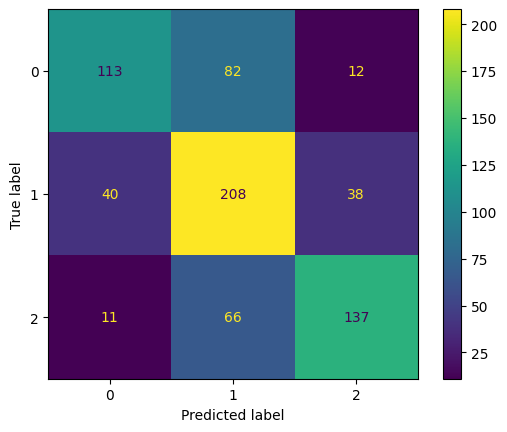

In [19]:
#Visualizing Model Results
t1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
t1.plot()

***Precision-Recall Curves:***

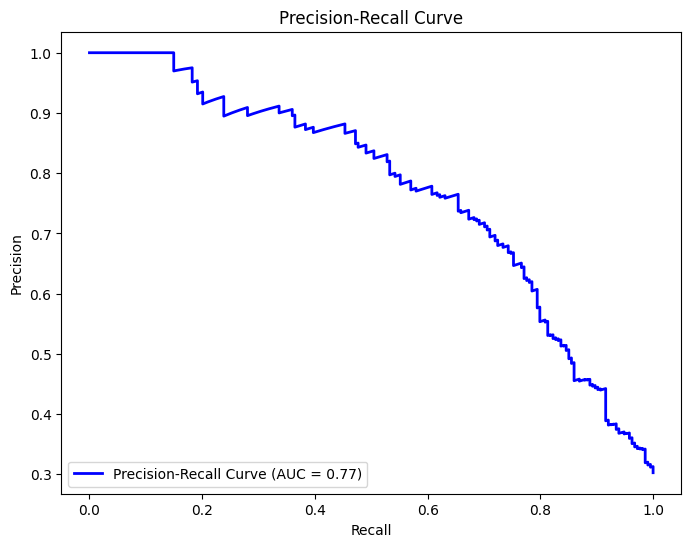

In [21]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels for 'positive' class
y_test_bin = label_binarize(y_test, classes=['negative', 'neutral', 'positive'])[:, 2]
y_scores_bin = model.predict_proba(X_test_tfidf)[:, 2]

# Compute precision-recall curve values
precision, recall, _ = precision_recall_curve(y_test_bin, y_scores_bin)

# Compute area under the precision-recall curve
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve (AUC = {:.2f})'.format(auc_score))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


***ROC-AUC:***

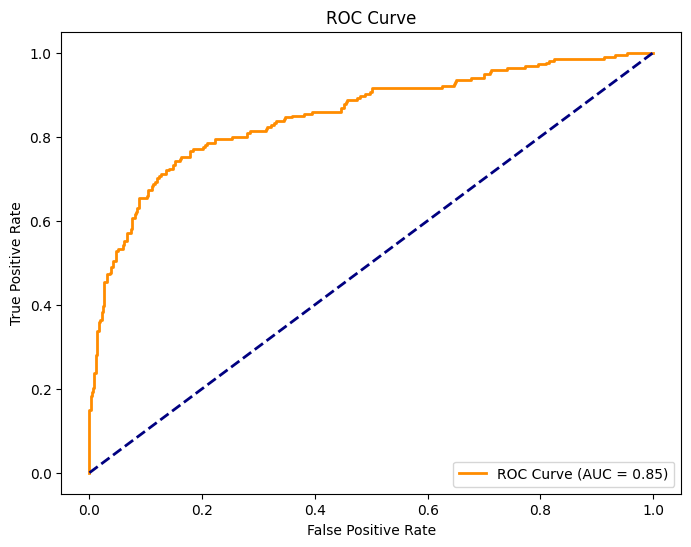

ROC-AUC Score: 0.8510265208242498


In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the labels for 'positive' class
y_test_bin = label_binarize(y_test, classes=['negative', 'neutral', 'positive'])[:, 2]
y_scores_bin = model.predict_proba(X_test_tfidf)[:, 2]

# Compute ROC curve values
fpr, tpr, _ = roc_curve(y_test_bin, y_scores_bin)

# Compute area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print ROC-AUC score
print('ROC-AUC Score:', roc_auc_score(y_test_bin, y_scores_bin))
